In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('shopping_behavior_updated.csv')

loading data

In [67]:
print(df.head(10))

   Customer ID  Age Gender Item Purchased     Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse     Clothing                     53   
1            2   19   Male        Sweater     Clothing                     64   
2            3   50   Male          Jeans     Clothing                     73   
3            4   21   Male        Sandals     Footwear                     90   
4            5   45   Male         Blouse     Clothing                     49   
5            6   46   Male       Sneakers     Footwear                     20   
6            7   63   Male          Shirt     Clothing                     85   
7            8   27   Male         Shorts     Clothing                     34   
8            9   26   Male           Coat    Outerwear                     97   
9           10   57   Male        Handbag  Accessories                     31   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       G

In [68]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [69]:
print(df.describe())

       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [70]:
df.shape

(3900, 18)

In [71]:
nulls = df.isnull().sum()
print('---------------------------------------------------')
print(nulls)
print('---------------------------------------------------')

---------------------------------------------------
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64
---------------------------------------------------


---------------------------------------------------------------------------------------------------------------------------------
Caterogical Analysis :


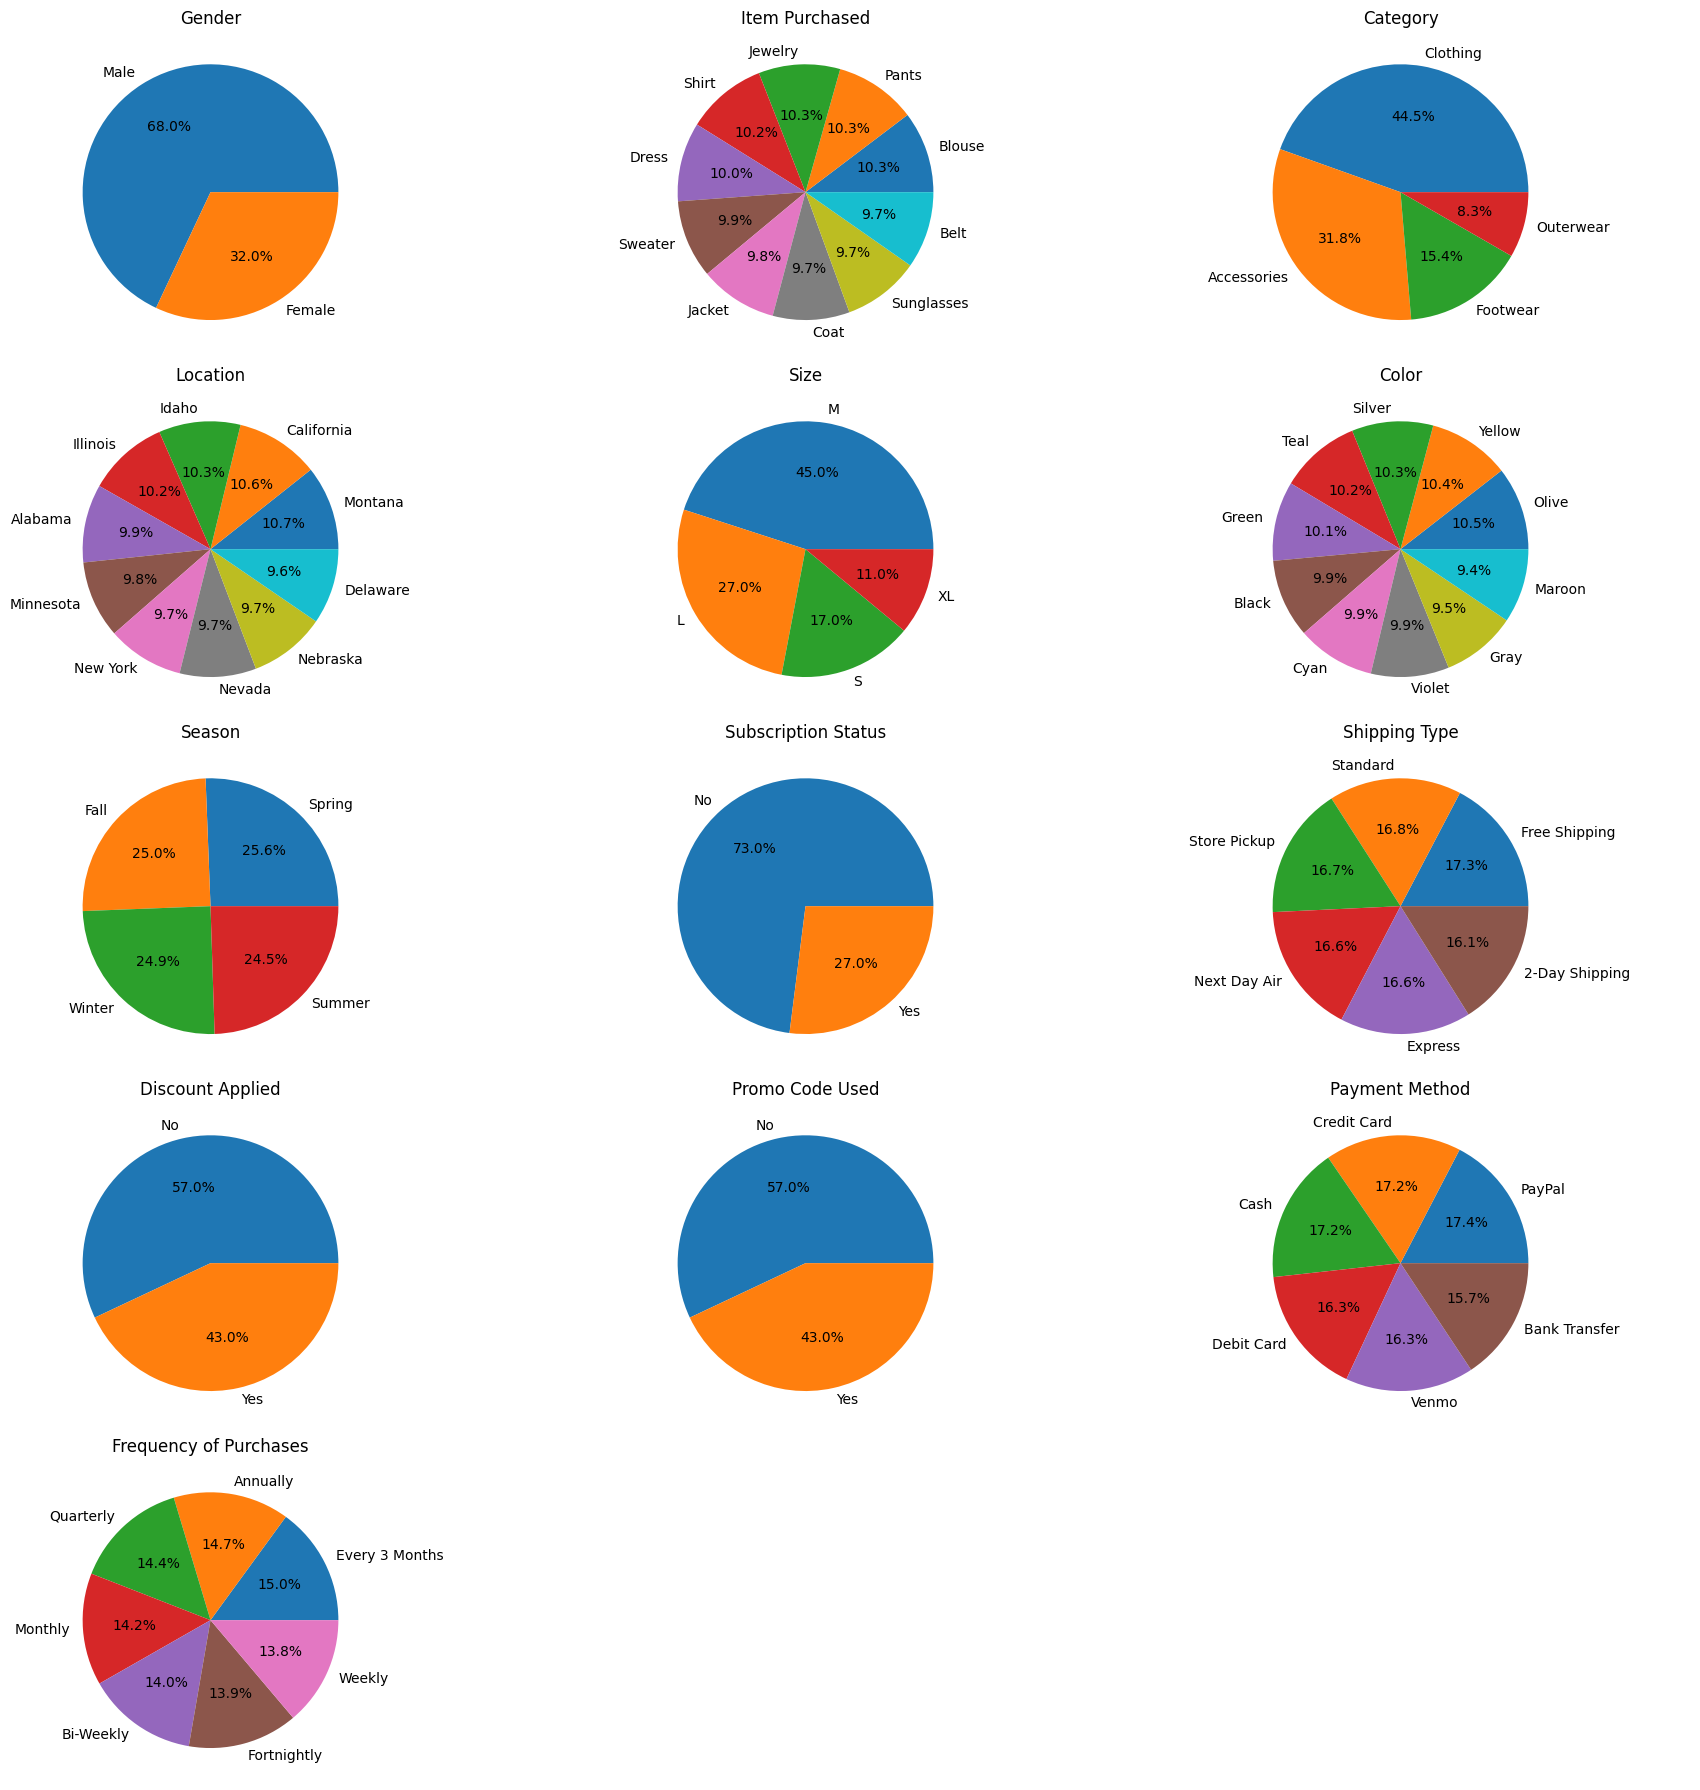

---------------------------------------------------------------------------------------------------------------------------------


In [72]:
print('---------------------------------------------------------------------------------------------------------------------------------')
print('Caterogical Analysis :')


categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 
                   'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 
                   'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

fig, axes = plt.subplots(5, 3, figsize=(18, 6 * 3))

axes = axes.flatten() 

for i, col in enumerate(categorical_cols):
    cir = df[col].value_counts()
    if len(cir) > 10:
        cir = cir.head(10)
        
    axes[i].pie(
        cir.values,
        labels=cir.index,
        autopct='%1.1f%%'
    )
    axes[i].set_title(f'{col}', fontsize=12)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
print('---------------------------------------------------------------------------------------------------------------------------------')


---------------------------------------------------------------------------------------------------------------------------------
Numercial Analysis


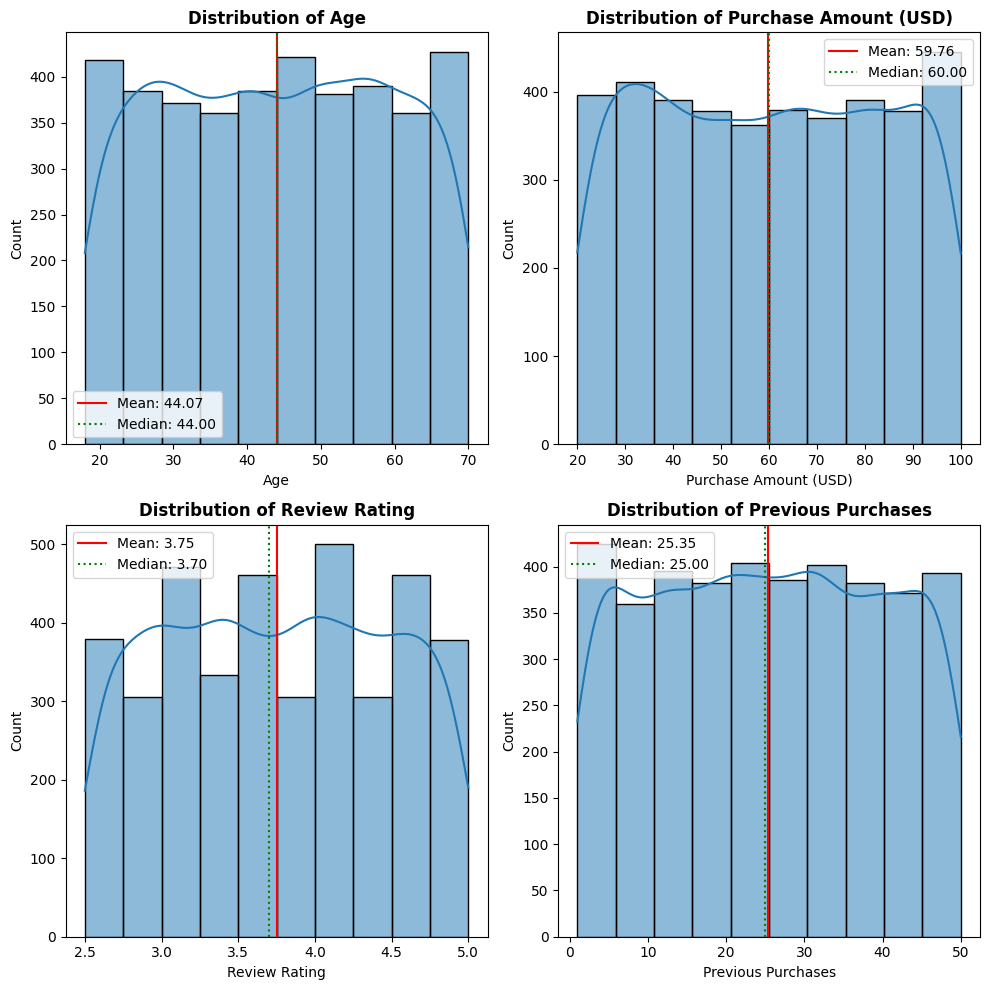

In [73]:
print('---------------------------------------------------------------------------------------------------------------------------------')
print('Numercial Analysis')


numercial_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

fig, axes= plt.subplots(2, 2, figsize=(10,10))
axes = axes.ravel()

for i, col in enumerate(numercial_cols):

    sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=10, element='bars')
    axes[i].set_title(f'Distribution of {col}', fontweight='bold')
    axes[i].axvline(df[col].mean(), color='red', linestyle='-', label=f'Mean: {df[col].mean():.2f}')
    axes[i].axvline(df[col].median(), color='green', linestyle=':', label=f'Median: {df[col].median():.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

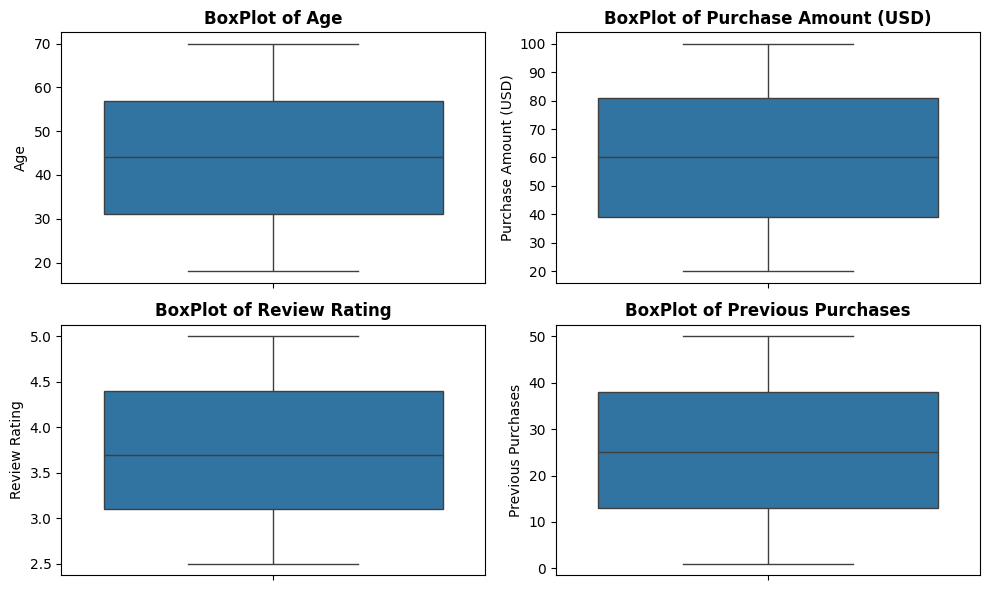

---------------------------------------------------------------------------------------------------------------------------------


In [74]:

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes = axes.flatten() 
numercial_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

for i, col in enumerate(numercial_cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'BoxPlot of {col}', fontweight='bold')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
print('---------------------------------------------------------------------------------------------------------------------------------')


<Axes: >

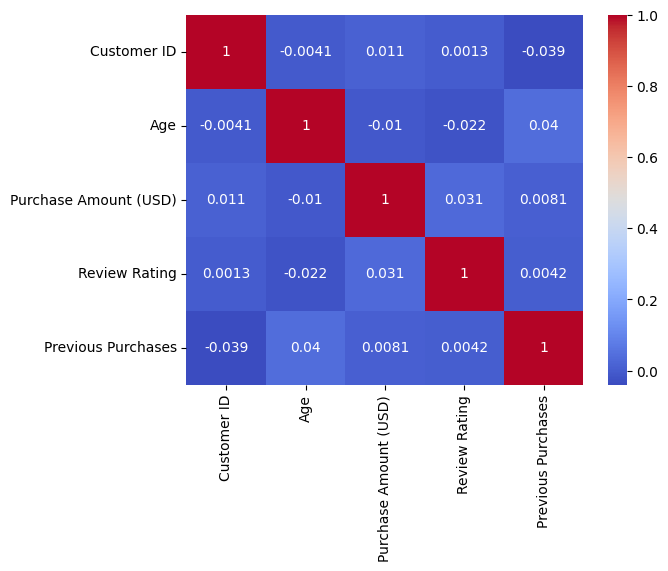

In [75]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

C:\Users\PC\AppData\Local\Temp\ipykernel_15876\2377591042.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0,0].legend(title='Spenders')


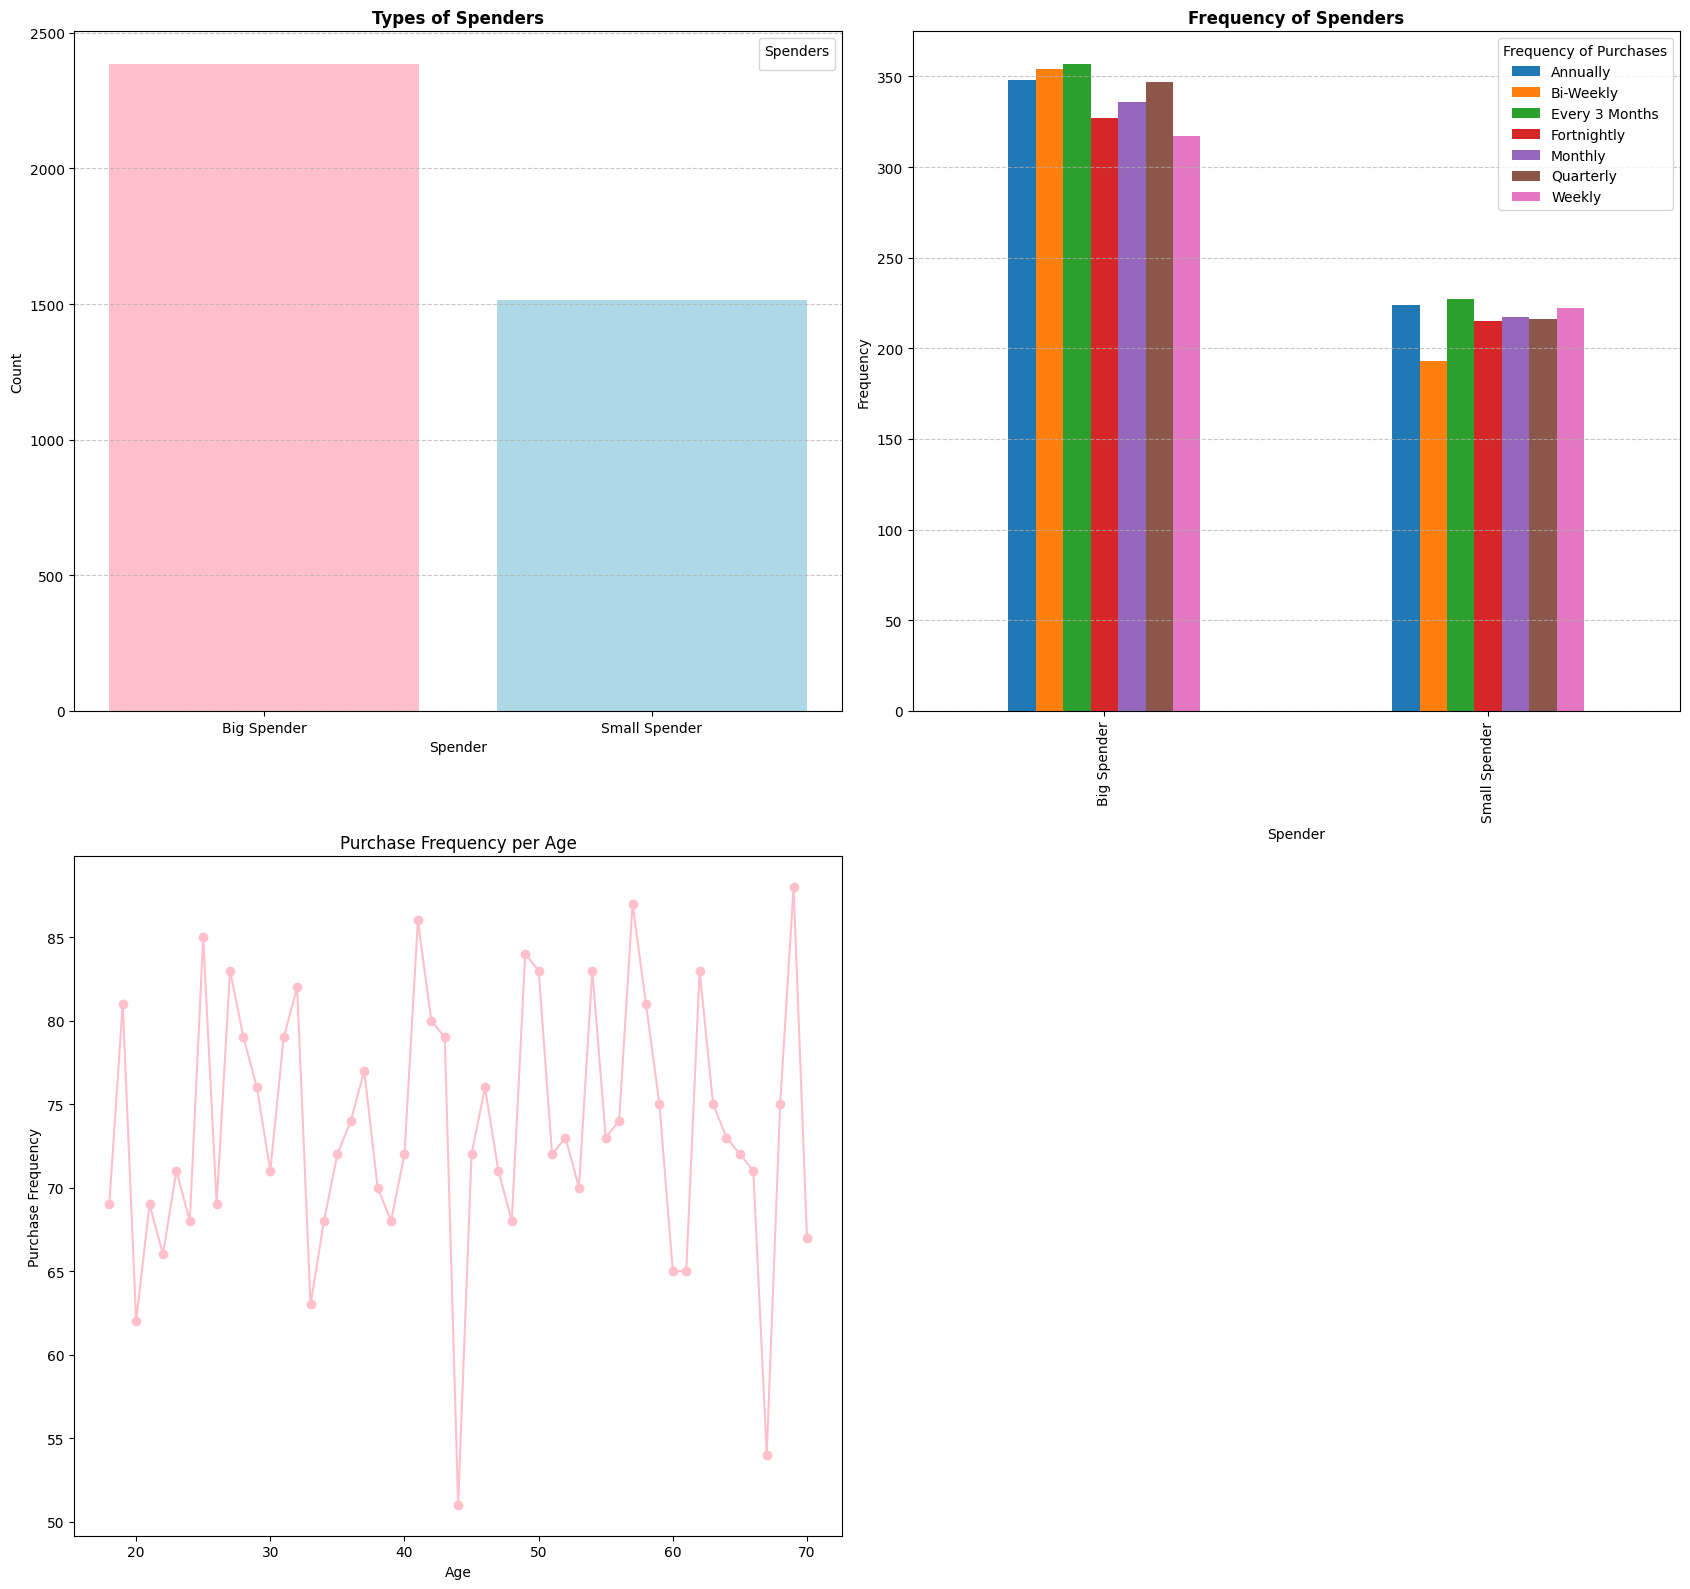

In [ ]:
fig, axes = plt.subplots(2,2 ,figsize=(17, 16))

df['Spender'] = np.where(df['Purchase Amount (USD)'] > 50, 'Big Spender', 'Small Spender')
spender = df['Spender'].value_counts().sort_index()
axes[0,0].bar(spender.index, spender.values, color=['pink', 'lightblue'])
axes[0,0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0,0].set_xlabel('Spender')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Types of Spenders', fontweight='bold')
axes[0,0].legend(title='Spenders')


frequency = df.groupby('Spender')['Frequency of Purchases'].value_counts().unstack(fill_value=0)
frequency.plot(kind='bar', ax=axes[0,1])
axes[0,1].grid(axis='y', linestyle='--', alpha=0.7)
axes[0,1].set_xlabel('Spender')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Frequency of Spenders', fontweight='bold')


age_pruchase = frequency = df.groupby('Age')['Purchase Amount (USD)'].count()
axes[1,0].plot(age_pruchase.index, age_pruchase.values, color='pink', marker='o')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Purchase Frequency')
axes[1,0].set_title('Purchase Frequency per Age', fontweight='bold')



for i in range(2):
    for j in range(2):
        if (i,j) not in [(0,0),(0,1),(1,0)]:
            axes[i,j].axis('off')
    
plt.tight_layout()
plt.show()